INTRODUCTION

This project examines different boba shops and their corresponding yelp ratings within the California Bay Area. The general hypothesis is that multiple brand-named boba stores like “Gong Cha” or “Kung Fu Tea” would be correlated with higher ratings compared to smaller chain shops. The higher-rating shops would also be located in a higher-density area where most boba shops would be located. I analyzed multiple cities about where tea shops are mostly concentrated at. In the case of quantifying by location, I focused on the hypothesis that higher rating shops would be located in cities that contain a higher quantity of stores.

The general hypothesis was interesting to me because I was interested in finding out if multi-chained shops would be placed higher than smaller chains. In the Bay Area, cost of living is rockets high compared to the rest of the country, and I wondered if smaller chains are at a disadvantage in the Bay Area, or whether they are located in cities that are less populated from their competitors. Due to drinking milk tea every so often, I decided to use tea shops as my research of choice for answering the general hypothesis.

My data set was used from a user from Kaggle that abstracted data using the Yelp API and organized info from multiple boba shops within the Bay Area. Although additional information such as address was provided, I only focused on using the shop name, rating, and coordinates within the data set.

Link to data set: https://datasetsearch.research.google.com/search?src=0&query=boba&docid=L2cvMTFqbnl6MWg2dg%3D%3D

Data Organization & Processing

The Code below loads the data from the .csv file and parses the data into multiple data frames.

In [2]:
# Gets necessary imports
import numpy as np
import heapq
import pandas as pd
import matplotlib.pyplot as plt
# Imports below are used for t test analysis
from statsmodels.stats.weightstats import ttest_ind
import pingouin as pg
import scipy.stats as stats

boba_data_set = pd.read_csv('bayarea_boba_spots.csv') # Reads the boba data set

# Organizes the boba data into their own individual variables
shop_names = boba_data_set['name'] # Gets all shop names
ratings = boba_data_set['rating'] # Gets all ratings
cities = boba_data_set['city'] # Gets all cities
latitudes = boba_data_set['lat'] # Gets the latitudes
longitudes = boba_data_set['long'] # Gets the Longitudes

# Hashamp(or dictionary) is used to pair the names with the scores for easy access, and averages any repeated shop names
# In each pair, the key will represent the store name, and the value will be a 
# numpy array holding two values: First index will be the average ratings,
# and the second will be the total quantity of that specific shop
hashmap = {}
for i in range(len(shop_names)):
    # Checks if the current shop already exist inside the hashmap, and add that to our total value.
    if shop_names[i] in hashmap:
        shop_arr = hashmap[shop_names[i]]
        shop_arr[1] += 1
        shop_arr[0] += float(ratings[i])
    # Initializes a new shop if it is not already present inside the hashmap
    else:
        new_arr = [0,0] # Each key within the hashmap will have a list of 2 vales: shop quantity and rating quantity
        new_arr[0] = float(ratings[i])
        new_arr[1] = 1
        hashmap[shop_names[i]] = new_arr

# We now average all the ratings if they have more than one shop 
for current in hashmap.keys():
    pair = hashmap[current]
    avg = pair[0] / pair[1]
    hashmap[current][0] = avg


housing_data_set = pd.read_csv('housing.csv') # Reads the housing data set

# Organizes the housing data into their own individual variables
longitudes_house = housing_data_set['longitude'] # Gets the longitudes of the houses
latitudes_house = housing_data_set['latitude'] # Gets the latitidues of the houses
house_values = housing_data_set['median_house_value'] # Gets the median house values

DATA VISUALIZATION

/var/folders/8c/lthywc3s61dbkw2kgtfdw68m0000gn/T/ipykernel_91386/4029927705.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


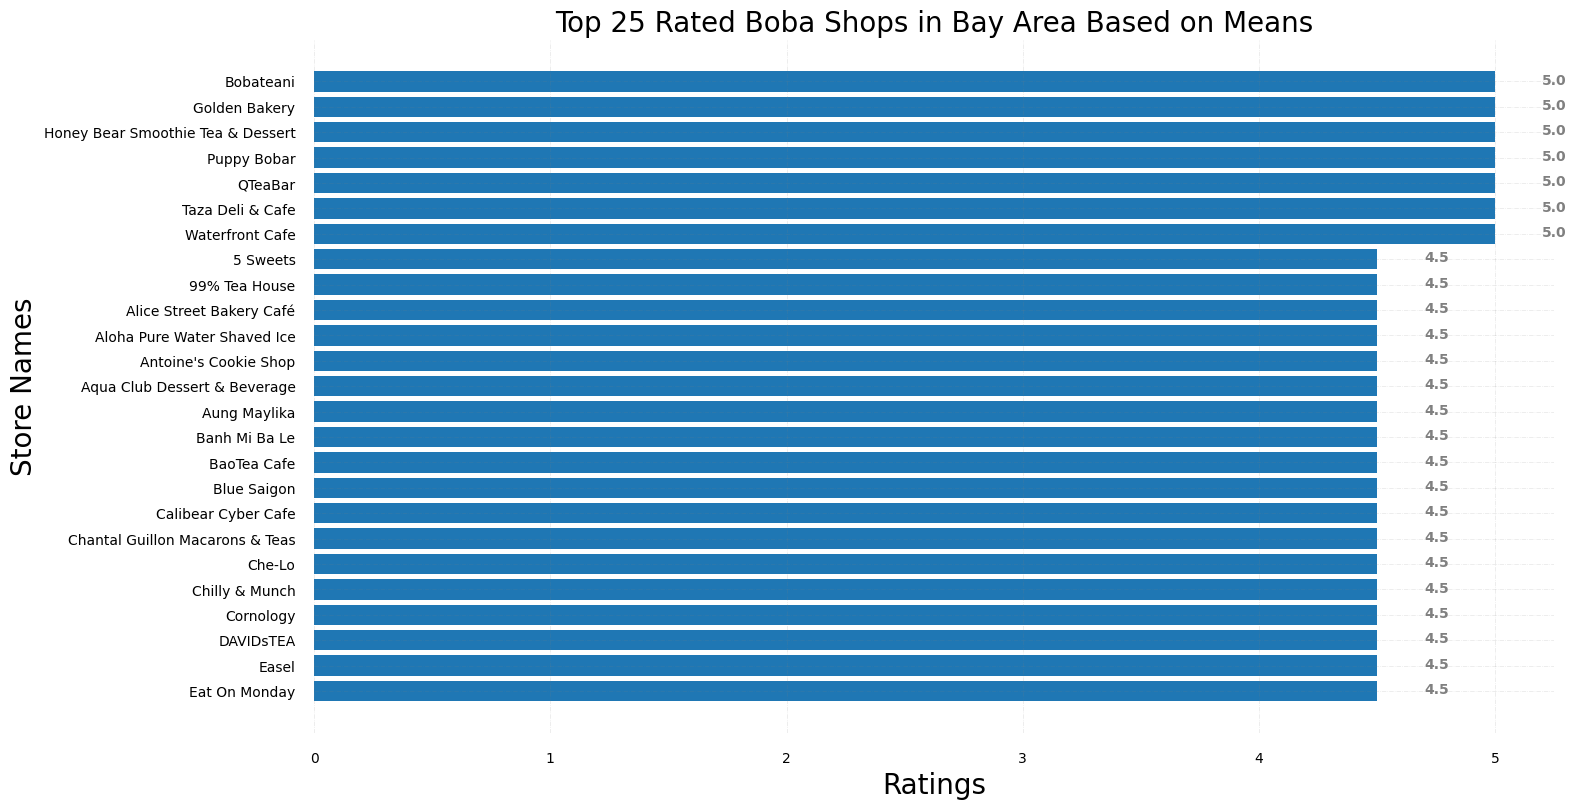

In [28]:
# Top 25 Scores:

# We will use a priority queue for this portion since its easier to get the top 25 values
prio_queue = []
top_25_stores_ratings = np.zeros(25) # Holds the top 25 store ratings
top_25_stores_names = [] # Holds the top 25 store names based on store ratings
# A set that traces duplicates
checker = set()
for i in range(len(shop_names)):
    # Continues if we see a duplicate
    if shop_names[i] in checker:
        continue
    # We initialize each shop within the hashmap and store it inside our priority queue
    new_list = [0,0,0]
    pair = hashmap[shop_names[i]]
    new_list[0] = pair[0] * -1
    new_list[1] = pair[1] * - 1
    new_list[2] = str(shop_names[i])
    heapq.heappush(prio_queue, new_list)
    checker.add(shop_names[i])

# The priority queue will have 2 main parameters to consider: The rating, and the quantity of the same shop.
# If the rating is the same, then the priority queue will
# consider which store has a higher quantity, and sort it based off that rule
# We will continue down this prio queue 25 times and insert values into our two sequence holders
for i in range(25):
    current = heapq.heappop(prio_queue)
    top_25_stores_ratings[i] = current[0] * -1
    top_25_stores_names.append(current[2])


fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(top_25_stores_names, top_25_stores_ratings)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 25 Rated Boba Shops in Bay Area Based on Means',
             loc ='center',fontsize = 20 )
# Adds the labels
plt.ylabel('Store Names', size = 20)
plt.xlabel('Ratings', size = 20)
# Show Plot
plt.show()

Figure 1:

The above figure shows the top 25 rated boba shops in the entire Bay Area based off the means of their shop ratings. This analysis reveals that only 7 shops out of the entire data set contains a perfect score, while the majority sits at a score of 4.5.

/var/folders/8c/lthywc3s61dbkw2kgtfdw68m0000gn/T/ipykernel_91386/4198401181.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


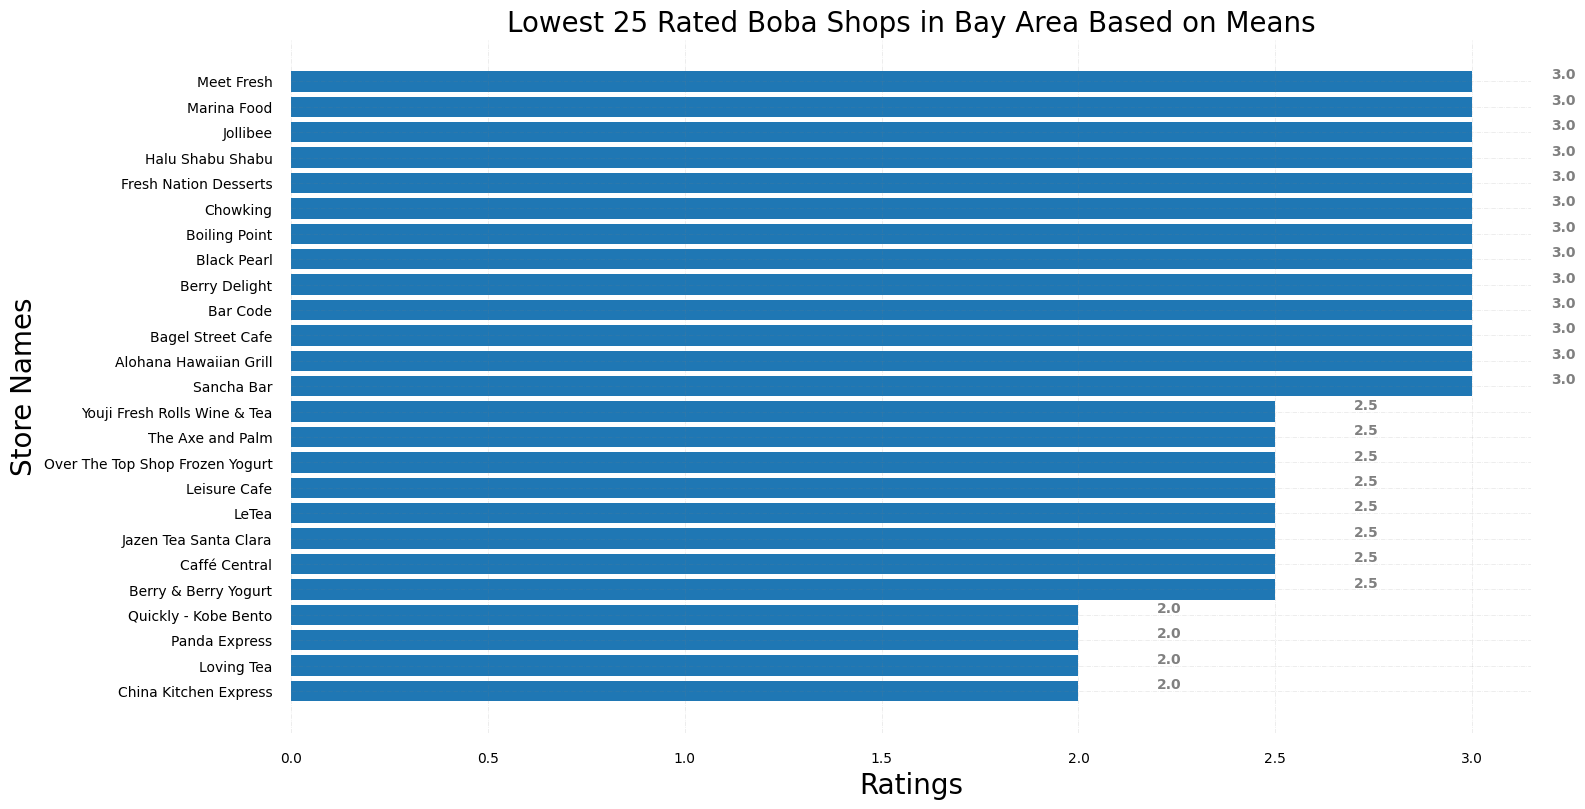

In [29]:
# Lowest 25 Scores:

# We will use a priority queue for this portion since its easier to get the lowest 25 values
prio_queue = []
low_25_stores_ratings = np.zeros(25)
low_25_stores_names = []
# A set that traces duplicates
checker = set()
for i in range(len(shop_names)):
    # Continues if we see a duplicate
    if shop_names[i] in checker:
        continue
    # We initialize each shop within the hashmap and store it inside our priority queue
    new_list = [0,0,0] # Three values will be placed in hashmap: rating quantity, shop quantity, and name of shop
    pair = hashmap[shop_names[i]]
    new_list[0] = pair[0]
    new_list[1] = pair[1] * - 1
    new_list[2] = str(shop_names[i])
    heapq.heappush(prio_queue, new_list) # Creates a heap tree for sorting purposes
    checker.add(shop_names[i])

# The priority queue will have 2 main parameters to consider: The rating, and the quantity of the same shop.
# If the rating is the same, then the priority queue will
# consider which store has a higher quantity, and sort it based off that rule. 
# We will continue down this prio queue 25 times and insert values into our two sequence holders
for i in range(25):
    current = heapq.heappop(prio_queue)
    low_25_stores_ratings[i] = current[0]
    low_25_stores_names.append(current[2])


fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(low_25_stores_names, low_25_stores_ratings)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Lowest 25 Rated Boba Shops in Bay Area Based on Means',
             loc ='center',fontsize = 20 )

# Adds the labels
plt.ylabel('Store Names', size = 20)
plt.xlabel('Ratings', size = 20)

# Show Plot
plt.show()

Figure 2:

The above figure shows the bottom 25 rated boba shops in the entire Bay Area based off the means of their shop ratings. Interestingly, there are popular shops such as Panda Express and Jollibee in this list.

[['Puppy Bobar', 'San Francisco'], ['QTeaBar', 'Oakland'], ['Bobateani', 'San Jose'], ['Golden Bakery', 'Pittsburg'], ['Honey Bear Smoothie Tea & Dessert', 'Hayward']]
5


/var/folders/8c/lthywc3s61dbkw2kgtfdw68m0000gn/T/ipykernel_91386/3330247821.py:55: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


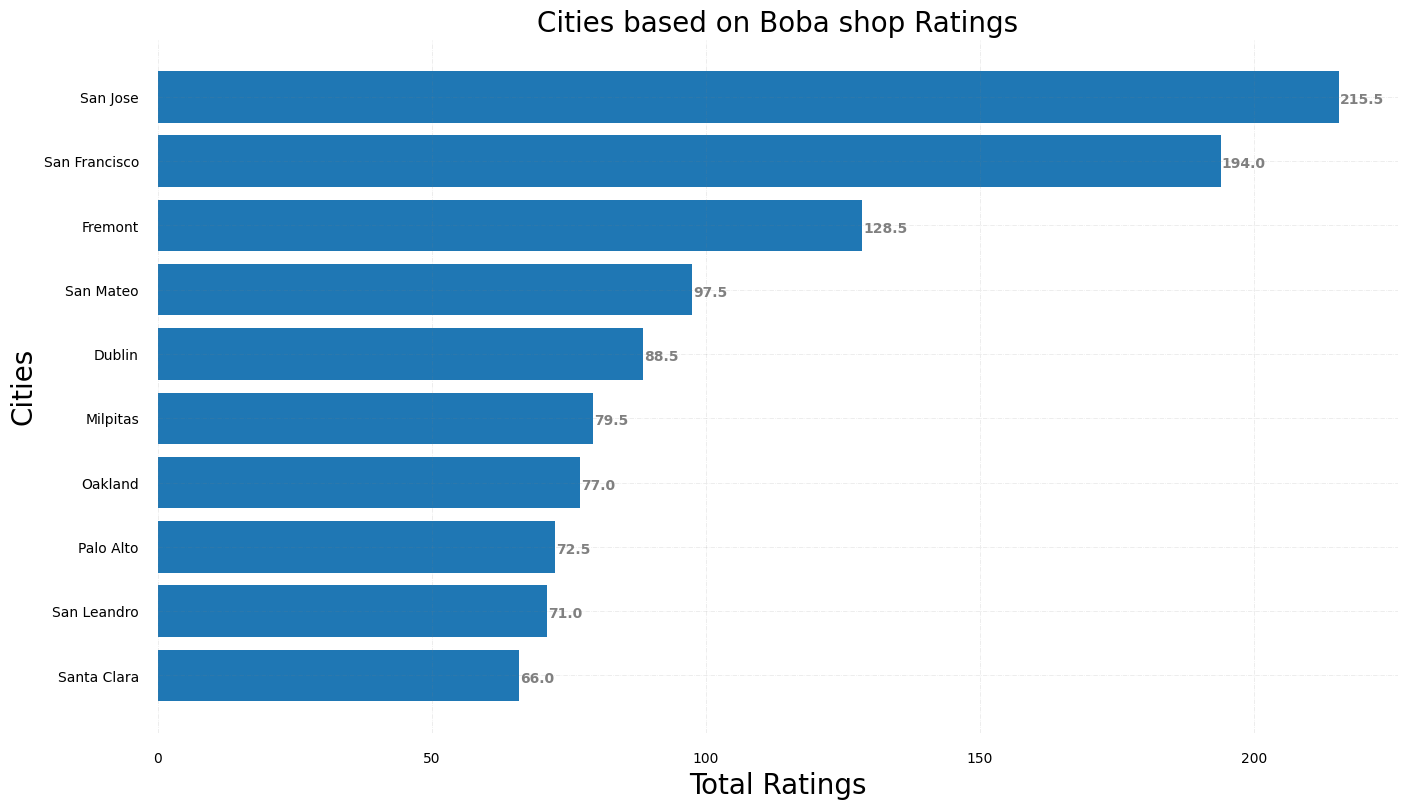

In [43]:
# Finding the top 10 cities that contain a higher rating, and printed cities of where the top 25 stores are located

total_ratings = {} # Finds the total ratings for each city

city_locations = [] # Holds the top 25 stores with the associated city location
for i in range(len(cities)):
    if cities[i] in total_ratings:
        total_ratings[cities[i]][0] += ratings[i]
    else:
        total_ratings[cities[i]] = [ratings[i], cities[i]]
    if shop_names[i] in top_25_stores_names[0:5]: # Finds if the current shop is within the top 5, if so, we mark its city location
        temp = []
        temp.append(shop_names[i])
        temp.append(cities[i])
        city_locations.append(temp)

print(city_locations) # Prints the top 5 stores with their cities marked with it.

temp = [] # Used for abstracting hashmap values and converting it to a list form
for i in total_ratings.keys(): # Converts hashmap values and keys to list form
    pair = []
    current = total_ratings[i]
    pair.append(current[0])
    pair.append(current[1])
    temp.append(pair)

temp.sort()
temp.reverse()

# Be your y axis
top_10_cities = []
# Our actual values for that assocaited city
scores = []

# Separates the 2d array into their own individual arrays
for i in range(10):
    top_10_cities.append(temp[i][1])
    scores.append(temp[i][0])


fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(top_10_cities, scores)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cities based on Boba shop Ratings',
             loc ='center',fontsize = 20 )
             
# Inverts the y axis so the highest values will be at the top
ax.invert_yaxis()
# Adds the labels
plt.ylabel('Cities', size = 20)
plt.xlabel('Total Ratings', size = 20)

# Show Plot
plt.show()

Figure 3:
The above figure represents a bar graph that accumulates the total amount of ratings within their own cities. Interestingly we can see that San Jose and San Francisco take the lead. Within the top 5 boba shops, only 2 out of the 5 are located within these two highly populated areas.

[[55, 'San Jose'], [49, 'San Francisco'], [34, 'Fremont'], [26, 'San Mateo'], [24, 'Dublin'], [21, 'San Leandro'], [21, 'Milpitas'], [20, 'Oakland'], [19, 'Santa Clara'], [19, 'Palo Alto'], [17, 'Cupertino'], [16, 'Vallejo'], [16, 'Pleasanton'], [15, 'Concord'], [13, 'Mountain View'], [12, 'Sunnyvale'], [12, 'Newark'], [11, 'Redwood City'], [11, 'Hayward'], [11, 'Fairfield'], [10, 'Union City'], [10, 'Davis'], [10, 'Berkeley'], [9, 'Alameda'], [8, 'Walnut Creek'], [8, 'Livermore'], [7, 'Foster City'], [7, 'Castro Valley'], [7, 'Burlingame'], [6, 'San Ramon'], [6, 'Pittsburg'], [6, 'Millbrae'], [5, 'Pleasant Hill'], [4, 'Vacaville'], [4, 'Richmond'], [4, 'Napa'], [4, 'Antioch'], [4, 'American Canyon'], [3, 'Suisun City'], [3, 'South San Francisco'], [3, 'Saratoga'], [3, 'San Rafael'], [3, 'Moraga'], [3, 'Los Altos'], [3, 'Lafayette'], [3, 'Campbell'], [3, 'Brentwood'], [3, 'Benicia'], [3, 'Belmont'], [2, 'Stanford'], [2, 'San Pablo'], [2, 'San Lorenzo'], [2, 'San Carlos'], [2, 'San Brun

Text(0.5, 1.0, 'Boba Shop Density within Bay Area')

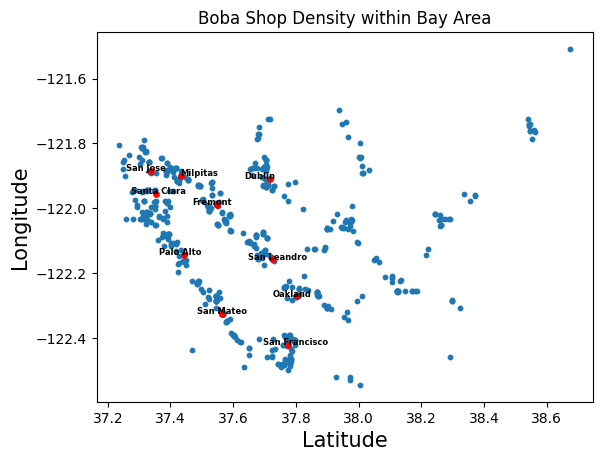

In [35]:
# Scatter plot to visualize specifically where most boba shops are spreaded out in the bay area
plt.scatter(latitudes, longitudes, s = 10)

# Since there are 69 cities in total, get the top 10 cities with highest rating boba shops, and plot those only.
city_to_ratings = {} # Hashmap that pairs the existing city with the total ratings
all_cities = set() # Gets all the cities within the data set without duplicates

# Organizes the cities based on the mean of the total ratings of shops within that city.
for i in range(len(cities)):
    current = cities[i]
    if current in city_to_ratings:
        city_to_ratings[current][0] += ratings[i]
        city_to_ratings[current][1] += 1
    else:
        temp = [ratings[i], 1]
        city_to_ratings[current] = temp
    all_cities.add(current)
# Organizes the data from the hashmap into a list for sorting
city_amounts = [] # Pairs the city with the total amount of shops in their city
for i in all_cities:
     current = city_to_ratings[i]
     pair = [current[1], i]
     city_amounts.append(pair)

city_amounts.sort()
city_amounts.reverse()
# Holds the coordinates for the top 10 city for plotting: this is just found from google
city_coords = [[37.3387, -121.8853], [37.77449, -122.4194], [37.5485, -121.9886],[37.5630,-122.3255], 
[37.7159, -121.9101], [37.7258, -122.1569], [37.4323, -121.8996], [37.8044,-122.2712],[37.3541,-121.9552], [37.4419,-122.1430]]
#plots the coords of top 10 cities 
counter = 0 # Counter for moving through the city_amounts list
for current in city_coords:
    plt.scatter(current[0],current[1], s=15, color = 'red')
    current_text = city_amounts[counter][1]
    # Fixes the overlap between the text
    if current_text == 'Milpitas':
        plt.text(current[0], current[1], current_text, fontsize = 6, fontweight = 'bold')
    else:
        plt.text(current[0] - .08, current[1], current_text, fontsize = 6, fontweight = 'bold')
    counter += 1
print(city_amounts)

# Prints the labels for the figure
plt.ylabel('Longitude', size = 15)
plt.xlabel('Latitude', size = 15)
plt.title('Boba Shop Density within Bay Area')



Figure 4:

The above figure represents a scatter plot of all boba shops. Blue dots represent stores while the the 10 red dots represent the top 10 cities with the highest concentrated boba shops. Interestingly, most boba shops are located near the bottom left of the map. While these mostly look evenly spreaded out between major cities, San jose and San Francisco statisically take the lead in having the most boba shops.

Ttest_indResult(statistic=-2.3711954987695996, pvalue=0.02263505775477575)


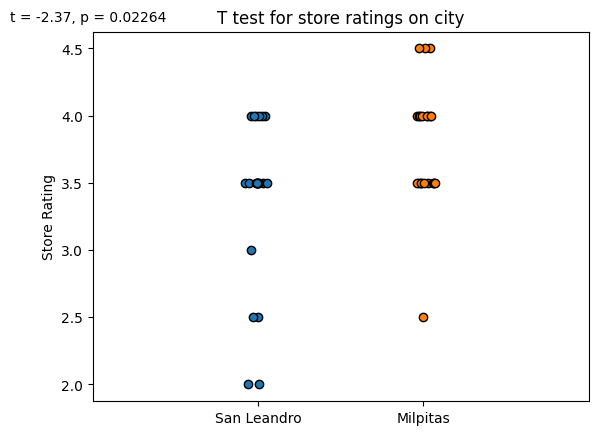

In [21]:


#(Both data sets have 21 shops in their cities)
san_leandro = [] # Getting data set for city San Leondro
milpitas = [] # Getting data set for city Milipitas

for i in range(len(cities)):
    if str(cities[i]) == 'San Leandro':
        san_leandro.append(ratings[i])
        continue
    if str(cities[i]) == 'Milpitas':
        milpitas.append(ratings[i])

# Conducts the t test anaylsis for us
t_test = stats.ttest_ind(san_leandro, milpitas)
# First value is the statistic: The difference within the size,
# Second value is the p-value
print(t_test)

plt.plot(np.random.randn(len(san_leandro)// 1)/ 30, san_leandro, 'o',  markeredgecolor = 'k')
plt.plot(np.random.randn(len(milpitas)) / 30 + 1, milpitas, 'o', markeredgecolor = 'k')

# Makes the x axis wider
plt.xlim([-1 , 2])
# Changes the ticks to teh two cities we are comparing
plt.xticks([0, 1], labels = ['San Leandro', 'Milpitas'])
plt.ylabel('Store Rating')

plt.text(-1.5,4.7,f't = {t_test[0]:.2f}, p = {t_test[1]:.5f}')
plt.title('T test for store ratings on city')

# Displays the figure
plt.show()


Figure 5:

A statisical comparison between two cities that contain the same number of boba shops. This independent T test determines whether these two cities have a significant difference within their ratings. The p score came to be very low which concluded that these two cities have ratings that are significantly different. Both cities have a lot of ratings within the 3.5 score, while San Leandro has the lowest rating and Milipitas has the highest store rating between the two.

DISCUSION

This project tested hypotheses related to boba stores and their ratings within the bay area. The data set was comparing 612 stores within 60 cities. I found that only 6 stores out of the entire dataset contain a perfect score of 5.0 while popular food chains such as gong cha, panda express, and jollibee did not reach the top 25 ratings bar. I also found that most of these highly rated stores are located within huge cities such as San Francisco and San Jose. When comparing two popular cities that had the same amount of boba shops, it was found that there was no similar (or preference) relationship between the two; they were both deemed to be separate ratings from each other. This concluded that stores with higher density of boba shops does not necessarily indicate that there is a higher ratings located in that city.

One limitation of this data set is that city radius were not included, so it was hard to determine where the boundaries of certain stores were located. The analysis of determining where most stores were located would be stronger and the conclusions would be more meaningful. Another consideration would to have considered the price per shop. The price per shop would have allowed us to determine if certain stores were preferred by the price or their quality.

These results opposed my original hypothesis that higher ratings would be carried by popular chained stores. While more smaller chains carry the industry of boba, it seems that the most populated cities of boba stores carry similar ratings as the top 25. This could be due to many factors, but there is still a lot of room for learning why people prefer certain boba shops and why which ones contain popular ratings over others.
